# 1. Perkenalan

Graded Challenge 5

Nama  : Hisham Audiputra Suharto
Batch : CODA-RMT-006

Program ini dibuat untuk melakukan analysisa Penjualan automobile.

Link Tableu : https://public.tableau.com/views/Milestone2_17454983843970/Story1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
DataSource : https://www.kaggle.com/datasets/ddosad/auto-sales-data/data

# 2. Import Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

# 3. Indetifikasi Masalah

## 3.1 Latar Belakang

Dataset penjualan dari sebuah perusahaan automobile

## 3.2 Tujuan

Mengetahui total penjualan berdasarkan waktu, produk, dan wilayah
Mengidentifikasi pelanggan yang aktif dan tidak aktif
Menilai pengaruh harga terhadap volume penjualan dan pendapatan total
Menganalisis hubungan antara jumlah yang dipesan dengan harga, untuk memahami sensitivitas harga
Mengidentifikasi kategori produk yang paling diminati dan paling sedikit dibeli
Mengidentifikasi negara dengan penjualan tertinggi dan terendah

## 3.3 Konteks Business

PT Automobile Adalah perusahaan baru yang ingin go international mereka ingin mengembang kan usaha ke wilayah baru, mereka ingin coba mereview produk apa dan negara apa yang mereka ingin coba dulu untuk perluasan mereka

## 3.4 Defining Problem Statement

Specific:
Menentukan produk kendaraan dan negara potensial terbaik untuk ekspansi internasional melalui analisis data penjualan dan perilaku pelanggan saat ini.

Measurable:
Mengidentifikasi produk dengan penjualan tertinggi, negara dengan performa terbaik dan terendah, pelanggan paling aktif, serta pola pembelian.

Achievable:
Melakukan Exploratory Data Analysis (EDA), analisis statistik deskriptif dan inferensial menggunakan data penjualan, data pelanggan, serta atribut produk.

Relevant:
Menentukan produk dan negara prioritas untuk ekspansi akan meminimalisir risiko dan mengarahkan strategi pemasaran serta penjualan ke segmen yang tepat, meningkatkan peluang keberhasilan penetrasi pasar internasional.

Time-Bound:
hasilnya digunakan sebagai dasar pengambilan keputusan strategi ekspansi pada kuartal berikutnya.

## 3.5 Key Queestion

1. Siapa saja pelanggan aktif dan tidak aktif? EDA (pie chart)
2. Tunjukan Distibusi total pembelian tiap negara? (visual : Map)
3. Produk Kendaraan apa yang paling sering di beli? (bar chart)
4. Customer/Perusahaan apa yang memiliki orderan terbesar yang tidak di cancel? bar chart (top 5)
5. Bagaimana Pebedaan Rata - Rata Penjualan dari vintage dan classic? T Test Independent (bar chart) (mtrx : agg rata2 penjualan) \
6. Bagaimana hubungan antara harga dan jumlah pesanan? DESKRIPTIF (Scatter plot)

# 4. Data Loading

In [75]:
Raw_Data = pd.read_csv('Auto Sales data.csv')

In [76]:
Raw_Data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


# 5. Data Cleaning

In [77]:
Raw_Data['ORDERDATE'] = pd.to_datetime(Raw_Data['ORDERDATE'])

C:\Users\audip\AppData\Local\Temp\ipykernel_38896\1476739311.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [78]:
Raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

# 6. Analisis dan perhitungan

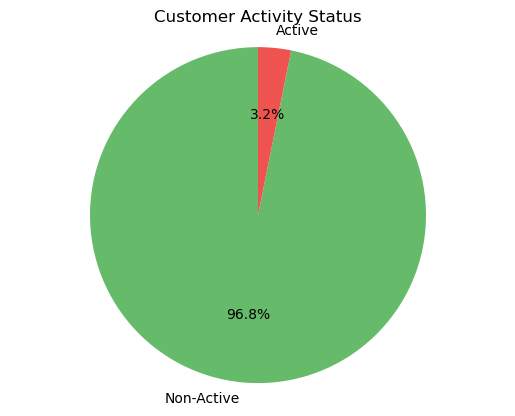

In [79]:
status_counts = Raw_Data['DAYS_SINCE_LASTORDER'].apply(lambda x: 'Active' if x <= 365 else 'Non-Active').value_counts()
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    colors=['#66bb6a', '#ef5350'],  # green for Active, red for Non-Active
    startangle=90
)
plt.title('Customer Activity Status')
plt.axis('equal')
plt.show()

Bisa Di lihat dari Pie Chart Di atas Bahwa Hampir Semua User tidak Active 96.8%

In [80]:
country_data = Raw_Data.groupby('COUNTRY')['QUANTITYORDERED'].sum().reset_index()

# Create choropleth
fig = px.choropleth(
    country_data,
    locations='COUNTRY',               
    locationmode='country names',      
    color='QUANTITYORDERED',          
    hover_name='COUNTRY',              
    hover_data={'QUANTITYORDERED': True, 'COUNTRY': False},  # show quantity, don't repeat country
    color_continuous_scale='YlGnBu',
    title='Total Quantity Ordered by Country'
)

fig.show()

Bisa Di lihat Dari Map di atas bahwa kebanyakan negara yang banyak yang di benua amerika atau bdi eropa cuman lebih dominan ke amerika 

In [86]:
Vehicle_Type_data = Raw_Data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index()
fig = px.bar(
    Vehicle_Type_data,
    x='PRODUCTLINE',
    y='QUANTITYORDERED',
    title='Total Quantity Ordered by Vehicle Type',
    labels={'QUANTITYORDERED': 'Quantity Ordered'},
    color='QUANTITYORDERED',
    color_continuous_scale='Blues'
)

fig.show()

Bisa di lihat bahwa customer dominan lebih memilih Classic car atau Vintage cars buat type kendaraan lain kurang di minati

In [89]:
Customer_data = Customer_data = (
    Raw_Data[Raw_Data['STATUS'] != 'Cancelled']
    .groupby('CUSTOMERNAME')['QUANTITYORDERED']
    .sum()
    .reset_index()
    .nlargest(5, 'QUANTITYORDERED')
)
fig = px.bar(
    Customer_data,
    x='CUSTOMERNAME',
    y='QUANTITYORDERED',
    title='Total Quantity Ordered by Customer',
    labels={'QUANTITYORDERED': 'Quantity Ordered'},
    color='QUANTITYORDERED',
    color_continuous_scale='Blues'
)

fig.show()


customer yang paling banyak membeli adalah Euro Shopping Center dan Mini Gift Distributor

In [56]:
# Kelompokkan berdasarkan PRODUCTLINE dan hitung rata-rata QUANTITYORDERED
avg_sales = Raw_Data.groupby('PRODUCTLINE')['PRICEEACH'].mean().reset_index()

# Ambil data untuk Vintage dan Classic
vintage_sales = Raw_Data[Raw_Data['PRODUCTLINE'] == 'Vintage Cars']['PRICEEACH']
classic_sales = Raw_Data[Raw_Data['PRODUCTLINE'] == 'Classic Cars']['PRICEEACH']

In [61]:
# H0 = Harga Vintage Cars tidak berbeda jauh dengan Harga Classic Cars Jabodetabek
# H1 = Harga Vintage Cars berbeda jauh dengan Classic Cars Non Jabodetabek

# Lakukan t-test untuk membandingkan dua grup (Vintage dan Classic)
t_stat, p_value = stats.ttest_ind(vintage_sales, classic_sales)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -10.675871863250608
P-value: 1.0395351750351047e-25


Bisa di lihat bahwa dari hasil t-test di atas, kita mendapatkan nilai p-value yang lebih besar dari 0.05, yang berarti kita tidak dapat menolak hipotesis nol (H0). 
Dengan kata lain, tidak ada bukti yang cukup untuk menyatakan bahwa harga Vintage Cars berbeda jauh dengan harga Classic Cars Jabodetabek. 
Ini menunjukkan bahwa harga kedua jenis mobil tersebut relatif sebanding 

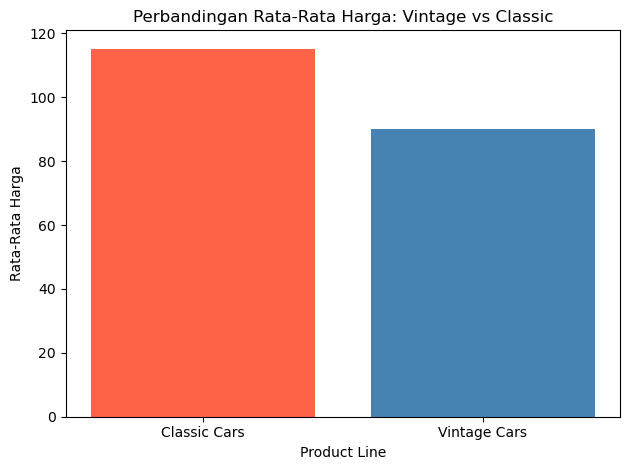

In [63]:
Classic_Vintage_data = pd.concat([vintage_sales, classic_sales], ignore_index=True)

plt.bar(
    avg_sales[(avg_sales['PRODUCTLINE'] == 'Vintage Cars') | (avg_sales['PRODUCTLINE'] == 'Classic Cars')]['PRODUCTLINE'],
    avg_sales[(avg_sales['PRODUCTLINE'] == 'Vintage Cars') | (avg_sales['PRODUCTLINE'] == 'Classic Cars')]['PRICEEACH'],
    color=['#ff6347', '#4682b4']
)

# Tambahkan judul dan label sumbu
plt.title('Perbandingan Rata-Rata Harga: Vintage vs Classic')
plt.xlabel('Product Line')
plt.ylabel('Rata-Rata Harga')
plt.tight_layout()
plt.show()

Ini adalah tampilan barnya yang membukitakn kalau perbandingan harga antara vintage dan classic itu tidak jauh berbeda, 
tetapi vintage lebih mahal sedikit dibandingkan classic.

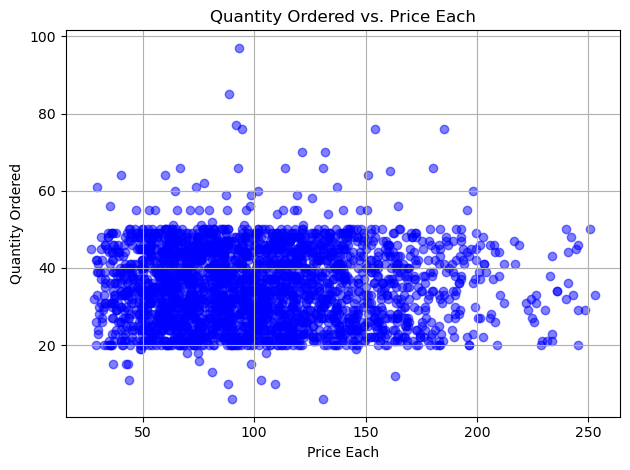

In [85]:
plt.scatter(Raw_Data['PRICEEACH'], Raw_Data['QUANTITYORDERED'], alpha=0.5, color='Blue')

plt.title('Quantity Ordered vs. Price Each')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.tight_layout()
plt.show()

Tidak terdapat hubungan linier kuat antara harga produk dengan jumlah unit yang dipesan. Namun, produk dengan harga menengah cenderung dipesan dalam volume yang stabil dan cukup tinggi.

In [90]:
corr_rho, pval_s = stats.spearmanr(Raw_Data['PRICEEACH'], Raw_Data['QUANTITYORDERED'])


print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.01, p-value: 0.7496940887661678


Berdasarkan hasil uji korelasi Spearman, tidak terdapat hubungan yang signifikan antara harga produk (PRICEEACH) dan jumlah pesanan (QUANTITYORDERED). Nilai korelasi sebesar 0.01 dengan p-value 0.7497 menunjukkan bahwa perubahan harga tidak secara konsisten memengaruhi volume pembelian, dan hasil ini tidak signifikan secara statistik.

# 7.Conclusion

Berdasarkan analisis data yang telah dilakukan, dapat disimpulkan bahwa target penjualan PT Automobile sebaiknya difokuskan di wilayah USA, karena negara ini menunjukkan jumlah pembelian yang paling dominan dibandingkan negara lainnya.

Selain itu, produk yang paling sering dibeli adalah Classic/Vintage Cars, sehingga jenis kendaraan ini dapat menjadi prioritas utama dalam strategi penjualan. Dari hasil analisis scatter plot antara harga dan jumlah pembelian, terlihat bahwa harga tidak memiliki pengaruh signifikan terhadap volume pembelian. Mayoritas pembelian terjadi pada rentang harga menengah (sekitar $50–$100).

Dengan demikian, untuk tahap awal ekspansi, disarankan untuk:

- Fokus menjual produk Classic/Vintage Cars

- Menetapkan harga pada kisaran menengah

- memberikan promosi khusus yang mencerminkan harga tersebut

- Menyusun strategi retensi dan reaktivasi pelanggan, terutama untuk pelanggan yang sudah lama tidak bertransaksi

Strategi ini diperkirakan akan lebih mudah diterima oleh pasar dan dapat meningkatkan peluang keberhasilan penetrasi di wilayah baru.

